In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'Arial','font.size':5})

In [14]:
patient_id = "CID4530N"

df_metadata = pd.read_csv("./patient_data/"+patient_id+"/metadata.csv",index_col=0)
df_AUCell_imputed = pd.read_csv("./patient_data/"+patient_id+"/output_AUCellscores_imputed.tsv",sep="\t",index_col=0).T
df_AUCell_not_imputed = pd.read_csv("./patient_data/"+patient_id+"/output_AUCellscores_not_imputed.tsv",sep="\t",index_col=0).T
df_liana = pd.read_csv("./patient_data/"+patient_id+"/output_data_liana.tsv",sep="\t",index_col=0)
df_imputed = pd.read_csv("./patient_data/"+patient_id+"/output_imputed_values.tsv",sep="\t",index_col=0)

In [15]:
df_concat = pd.concat([df_imputed,df_AUCell_imputed,df_metadata],axis=1)
df_metadata.groupby("celltype_minor").count()["celltype_major"]

celltype_minor
CAFs MSC iCAF-like              179
CAFs myCAF-like                 189
Cancer Basal SC                  71
Cancer Cycling                   15
Cancer Her2 SC                   33
Cancer LumA SC                 1145
Cancer LumB SC                  451
Cycling T-cells                   1
Cycling_Myeloid                   3
DCs                              17
Endothelial ACKR1               573
Endothelial CXCL12              268
Endothelial Lymphatic LYVE1      20
Endothelial RGS5                155
Luminal Progenitors             207
Macrophage                       47
Mature Luminal                  145
Monocyte                         29
Myoepithelial                    46
NK cells                         11
NKT cells                        45
PVL Differentiated              340
PVL Immature                    129
Plasmablasts                     55
T cells CD4+                    127
T cells CD8+                    108
Name: celltype_major, dtype: int64

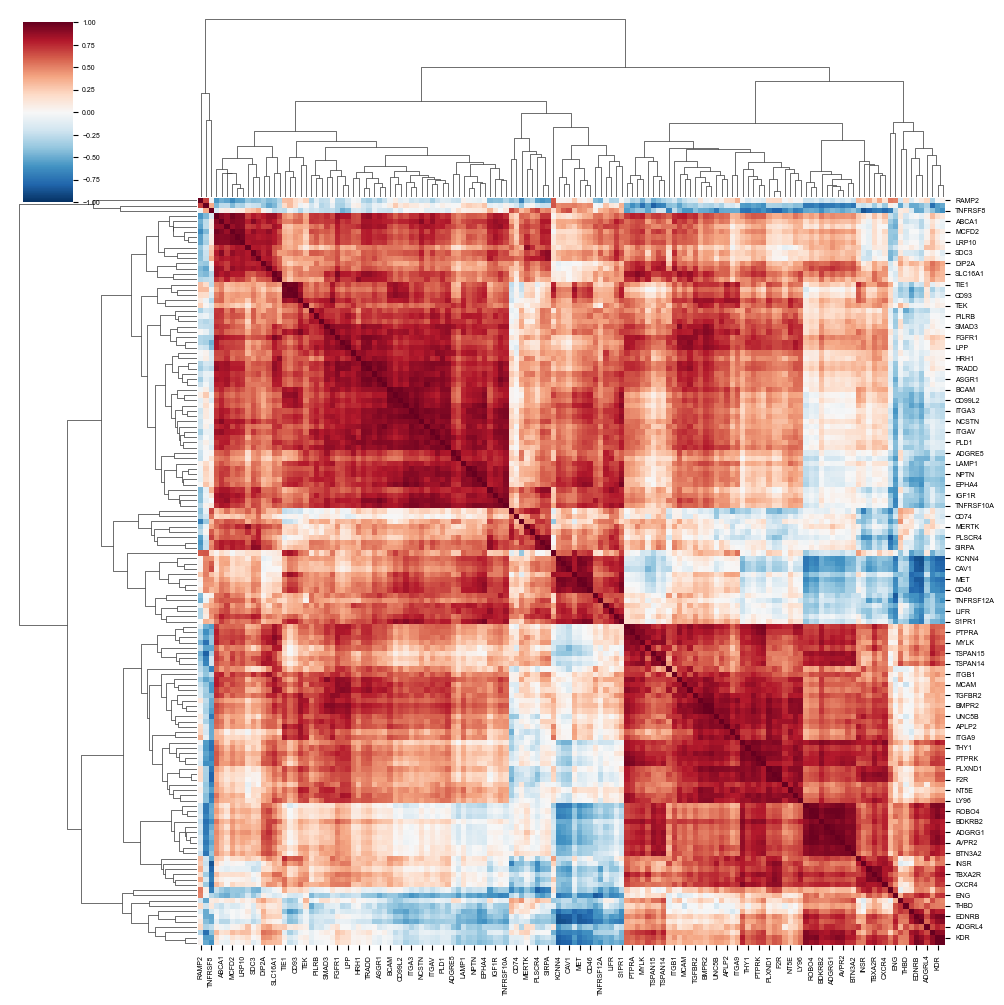

In [23]:
source_cell_type= ["Endothelial ACKR1"]
target_cell_type = ["Endothelial CXCL12"]
df_subset = df_concat[df_concat["celltype_minor"].isin(target_cell_type)]
df_liana_subset = df_liana[(df_liana["target"].isin(target_cell_type)) & (df_liana["source"].isin(source_cell_type))]
df_targets = set([])
for i in list(df_liana_subset["receptor.complex"]):
    if "_" in i:
        df_targets.add(i.split("_")[0])
        df_targets.add(i.split("_")[1])
    else:
        df_targets.add(i)
sns.clustermap(df_subset[df_targets].corr(method="spearman"),vmin=-1,vmax=1,cmap="RdBu_r")
plt.savefig("./output.png",dpi=800)

<AxesSubplot:xlabel='luminal_breast_cancer', ylabel='basal_breast_cancer'>

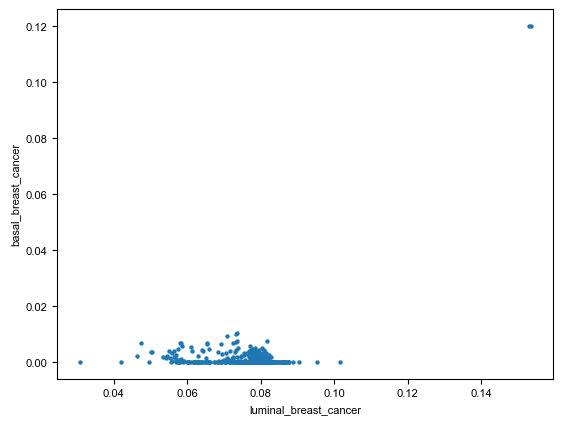

In [12]:
sns.scatterplot(data=df_subset,x="luminal_breast_cancer",y='basal_breast_cancer',linewidth=0,s=10)